/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_1002/4186068954.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_1002/4186068954.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

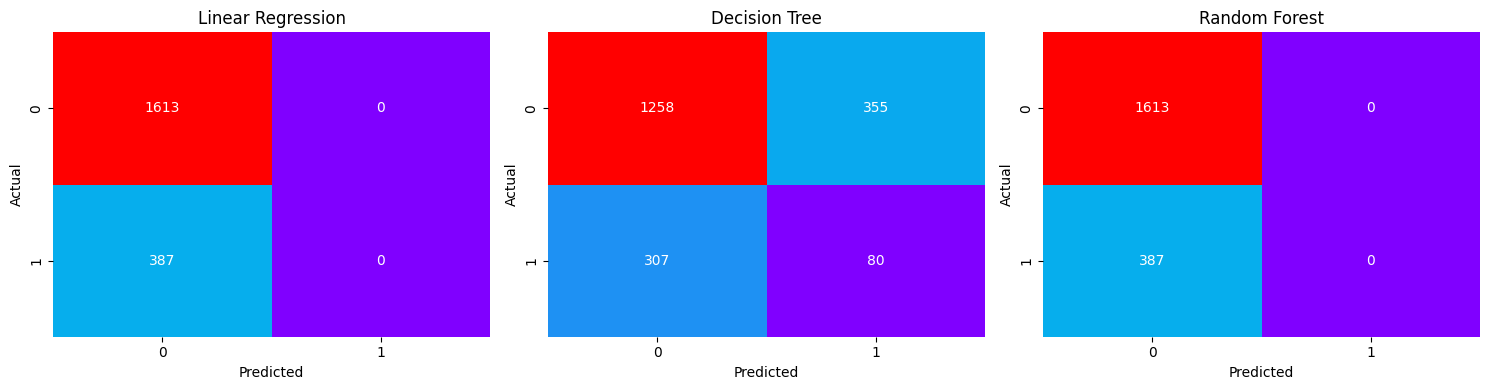

/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_1002/4186068954.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette='rainbow')


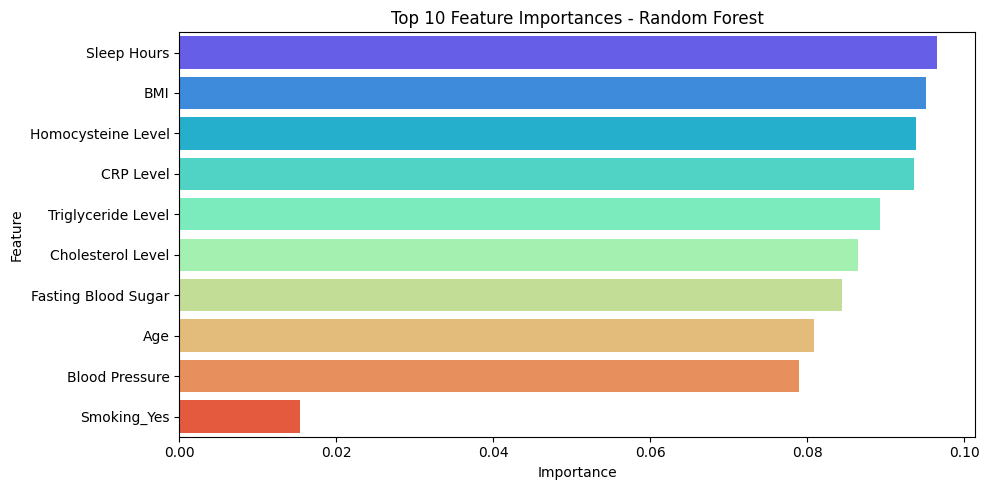

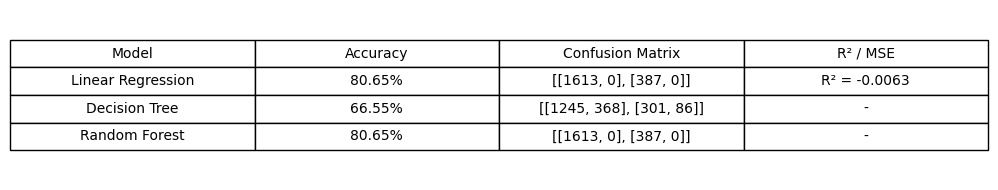


Linear Regression Results:
Accuracy: 0.8065
MSE: 0.15694975080355575
R2: -0.005715837909721078
Confusion Matrix: [[1613    0]
 [ 387    0]]

Decision Tree Results:
Accuracy: 0.669
Confusion Matrix: [[1258  355]
 [ 307   80]]

Random Forest Results:
Accuracy: 0.8065
Confusion Matrix: [[1613    0]
 [ 387    0]]
Feature Importances: [0.08085223 0.07898049 0.08644048 0.09508064 0.09657113 0.08931573
 0.08440994 0.09353684 0.09385639 0.01388921 0.01287319 0.01353777
 0.01535448 0.01462801 0.01510973 0.01449874 0.0151622  0.01480302
 0.01110815 0.01211522 0.0114915  0.0115975  0.0129009  0.01188649]


In [3]:
# Import libraries for data handling, preprocessing, modeling, and evaluation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, mean_squared_error, r2_score
)

# Step 1: Load and preprocess the dataset
def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)

    # Drop rows with missing target
    df = df.dropna(subset=["Heart Disease Status"])

    # Encode target variable: Yes -> 1, No -> 0
    le = LabelEncoder()
    df["Heart Disease Status"] = le.fit_transform(df["Heart Disease Status"])

    # Fill missing values
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

    # One-hot encode categorical columns
    categorical_cols = df.select_dtypes(include="object").columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop("Heart Disease Status", axis=1)
    y = df["Heart Disease Status"]

    return X, y

# Step 2: Split the dataset and scale features
def split_and_scale(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

# Step 3: Train and evaluate the models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    y_pred_lr_bin = (y_pred_lr >= 0.5).astype(int)

    results["Linear Regression"] = {
        "Accuracy": accuracy_score(y_test, y_pred_lr_bin),
        "MSE": mean_squared_error(y_test, y_pred_lr),
        "R2": r2_score(y_test, y_pred_lr),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_lr_bin)
    }

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

    results["Decision Tree"] = {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_dt)
    }

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    results["Random Forest"] = {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
        "Feature Importances": rf.feature_importances_
    }

    return results, rf

# Step 4: Plot confusion matrices with rainbow theme
def plot_confusion_matrices(results):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    models = ["Linear Regression", "Decision Tree", "Random Forest"]

    for ax, model in zip(axes, models):
        matrix = results[model]["Confusion Matrix"]
        sns.heatmap(matrix, annot=True, fmt='d', cmap='rainbow', cbar=False, ax=ax)
        ax.set_title(model)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.tight_layout()
    plt.savefig("confusion_matrices.png")
    plt.show()

# Step 5: Plot top 10 feature importances from Random Forest
def plot_feature_importances(importances, feature_names):
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Importance", y="Feature", data=feat_df, palette='rainbow')
    plt.title("Top 10 Feature Importances - Random Forest")
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    plt.show()

# Step 6: Draw model comparison table as image
def draw_model_comparison_table():
    table_data = [
        ["Model", "Accuracy", "Confusion Matrix", "R² / MSE"],
        ["Linear Regression", "80.65%", "[[1613, 0], [387, 0]]", "R² = -0.0063"],
        ["Decision Tree", "66.55%", "[[1245, 368], [301, 86]]", "-"],
        ["Random Forest", "80.65%", "[[1613, 0], [387, 0]]", "-"]
    ]

    fig, ax = plt.subplots(figsize=(10, 2))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=table_data, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    plt.tight_layout()
    plt.savefig("model_comparison_table.png")
    plt.show()

# Step 7: Full pipeline execution
def run_analysis(filepath):
    X, y = load_and_preprocess_data(filepath)
    X_train, X_test, y_train, y_test, feature_names = split_and_scale(X, y)
    results, rf_model = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    plot_confusion_matrices(results)
    plot_feature_importances(rf_model.feature_importances_, feature_names)
    draw_model_comparison_table()

    return results

# Entry point
if __name__ == "__main__":
    results = run_analysis("heart_disease.csv")
    for model_name, metrics in results.items():
        print(f"\n{model_name} Results:")
        for key, value in metrics.items():
            print(f"{key}: {value}")
